- 对话：`glm-4-9b-chat`
- 文生图：`kolors_diffusers`
- 多模态：`mini_cpm-v2_6`

In [5]:
from openai import OpenAI

In [7]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
models_list = client.models.list()
models_list.data

APIConnectionError: Connection error.

### kolors

In [4]:
respose = client.images.generate(
    model="kolors_diffusers",
    prompt="五只黑小猫，在散步。",
    size="1792x1024",
    response_format="b64_json",
)

APIConnectionError: Connection error.

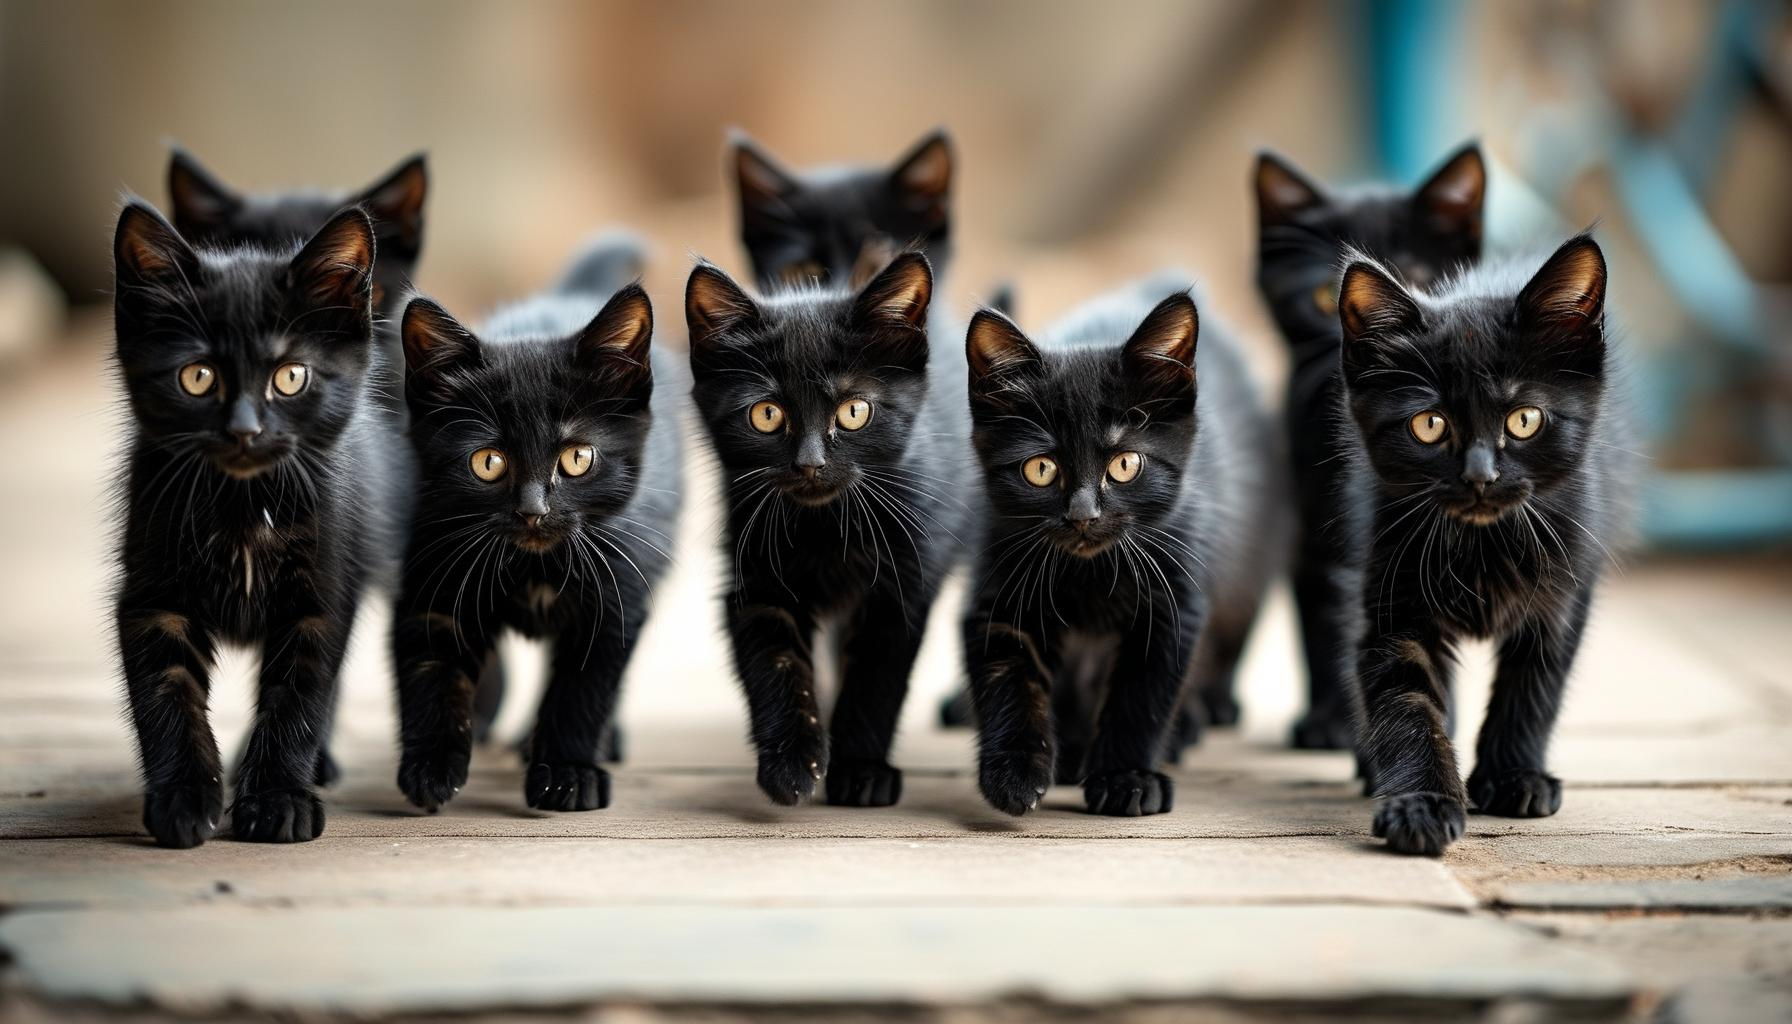

In [8]:
from zlai.utils.image import *
trans_bs64_to_image(respose.data[0].b64_json)

## Qwen2-1.5B-Instruct

In [ ]:
# Qwen2-1.5B-Instruct
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="Qwen2-1.5B-Instruct",
    messages=[
        {"role": "user", "content": "Hello"},
    ],
)
print(completion.choices[0].message.content)

## Qwen2-1.5B-Instruct

In [ ]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")

stream = client.chat.completions.create(
    model="Qwen2-1.5B-Instruct",
    messages=[{"role": "user", "content": "hi"}],
    stream=True,
)
answer = ""
for chunk in stream:
    content = chunk.choices[0].delta.content
    answer += content
    print(answer)

## Qwen2-7B-Instruct

In [ ]:
# Qwen2-1.5B-Instruct
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="Qwen2-7B-Instruct",
    messages=[
        {"role": "user", "content": "你好"},
    ],
)
print(completion.choices[0].message.content)

## lm-4-9b-chat

### not stream

In [27]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="glm-4-9b-chat",
    messages=[
        {"role": "user", "content": "你好"},
    ],
    stream=False
)
print(completion.choices[0].message.content)


你好👋！很高兴见到你，有什么可以帮助你的吗？


In [28]:
completion

ChatCompletion(id='chatUCBhcvPeH6QDgiki', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='\n你好👋！很高兴见到你，有什么可以帮助你的吗？', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1723194896, model='glm-4-9b-chat', object='chat.completion', service_tier=None, system_fingerprint=None, usage=None)

### stream

In [10]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="glm-4-9b-chat",
    messages=[
        {"role": "user", "content": "你好"},
    ],
    stream=True
)

for chunk in completion:
    content = chunk.choices[0].delta.content
    print(content, flush=True, end='')

 
你好👋！很高兴见到你，有什么可以帮助你的吗？ 

### tool call no stream

In [11]:
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_current_weather",
            "description": "Get the current weather",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    },
                    "format": {
                        "type": "string",
                        "enum": ["celsius", "fahrenheit"],
                        "description": "The temperature unit to use. Infer this from the users location.",
                    },
                },
                "required": ["location", "format"],
            },
        }
    },
]

In [12]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="glm-4-9b-chat",
    messages=[
        {"role": "user", "content": "What's the Celsius temperature in San Francisco?"},
    ],
    tools=tools,
    tool_choice="auto",
    stream=False,
    
)
print("content: ", completion.choices[0].message.content)
if completion.choices[0].message.tool_calls:
    print("function name: ", completion.choices[0].message.tool_calls[0].function.name)
    print("function arguments: ", completion.choices[0].message.tool_calls[0].function.arguments)

content:  None
function name:  get_current_weather
function arguments:  {"location": "San Francisco, CA", "format": "celsius"}


In [13]:
from zlai.types.messages import *

messages=[
    UserMessage(content="What's the Celsius temperature in San Francisco?").model_dump(),
    completion.choices[0].message.model_dump(),
    ToolMessage(content="{San Francisco, CA: {celsius: 15}}").model_dump(),
]

completion = client.chat.completions.create(
    model="glm-4-9b-chat",
    messages=messages,
    tools=tools,
    tool_choice="auto",
    stream=False,
    
)

In [14]:
print(completion.choices[0].message.content)


The current Celsius temperature in San Francisco is 15 degrees.


### tool call stream

In [15]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="glm-4-9b-chat",
    messages=[
        {"role": "user", "content": "What's the Celsius temperature in San Francisco?"},
    ],
    tools=tools,
    tool_choice="auto",
    stream=True,
)

answer = ""
for chunk in completion:
    content = chunk.choices[0].delta.content
    if content:
        answer += content
        print(answer)

 
 get_current_weather

 get_current_weather
{"location": 
 get_current_weather
{"location": "San 
 get_current_weather
{"location": "San Francisco, 
 get_current_weather
{"location": "San Francisco, CA", 
 get_current_weather
{"location": "San Francisco, CA", "format": 
 get_current_weather
{"location": "San Francisco, CA", "format": "celsius"} 


In [16]:
print("content: ", chunk.choices[0].delta.content)
if chunk.choices[0].delta.tool_calls:
    print("function name: ", chunk.choices[0].delta.tool_calls[0].function.name)
    print("function arguments: ", chunk.choices[0].delta.tool_calls[0].function.arguments)

content:  None
function name:  get_current_weather
function arguments:  {"location": "San Francisco, CA", "format": "celsius"}


In [17]:
from zlai.types.messages import ToolMessage

messages=[
    UserMessage(content="What's the Celsius temperature in San Francisco?"),
    chunk.choices[0].delta,
    ToolMessage(content="{San Francisco, CA: {celsius: 15}}"),
]

completion = client.chat.completions.create(
    model="glm-4-9b-chat",
    messages=messages,
    tools=tools,
    tool_choice="auto",
    stream=True,
    
)

In [18]:
answer = ""
for chunk in completion:
    content = chunk.choices[0].delta.content
    if content:
        answer += content
        print(answer)

 

 
The 
 
The current 
 
The current Celsius 
 
The current Celsius temperature 
 
The current Celsius temperature in 
 
The current Celsius temperature in San 
 
The current Celsius temperature in San Francisco 
 
The current Celsius temperature in San Francisco is 
 
The current Celsius temperature in San Francisco is 15 
 
The current Celsius temperature in San Francisco is 15 degrees. 
 
The current Celsius temperature in San Francisco is 15 degrees.  
The current Celsius temperature in San Francisco is 15 degrees. 


## lm-4v-9b

In [20]:
from openai import OpenAI
from zlai.types.messages import ImageMessage, UserMessage, AssistantMessage

img = "https://pic2.zhimg.com/v2-70ea697c0edec518b9d513a49228e489_b.jpg"

messages = [
    UserMessage(content="你好"),
    AssistantMessage(content="你好"),
    ImageMessage(content="解析图片中的文字", images_url=[img]),
]
messages = [message.model_dump() for message in messages]
# messages

### not stream

In [21]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="glm-4v-9b",
    messages=messages,
)
print(completion.choices[0].message.content)

图片中的文字有“悦享先锋”、“B级先锋猎装SUV”、“宋L”和“知乎@七万钣金中里毅”。其中“悦享先锋”和“B级先锋猎装SUV”是宋L这款车的宣传语，突出了这款车的特点和定位。“宋L”是这款车的名称，“知乎@七万钣金中里毅”可能是图片来源或作者的标注。


### stream

In [22]:
client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="glm-4v-9b",
    messages=messages,
    stream=True,
)

for chunk in completion:
    content = chunk.choices[0].delta.content
    print(content, flush=True, end='')

 图片中的文字有“悦享先锋”、“B级先锋猎装SUV”、“宋L”和“知乎@七万钣金中里毅”。其中“悦享先锋”和“B级先锋猎装SUV”是宋L这款车的宣传语，突出了这款车的特点和定位。“宋L”是这款车的名称，“知乎@七万钣金中里毅”可能是图片来源或作者的标注。 

## mini-cpm

In [23]:
from openai import OpenAI
from zlai.types.messages import ImageMessage, UserMessage, AssistantMessage

img = "https://pic2.zhimg.com/v2-70ea697c0edec518b9d513a49228e489_b.jpg"

messages = [
    UserMessage(content="你好"),
    AssistantMessage(content="你好"),
    ImageMessage(content="解析图片中的文字", images_url=[img]),
]
messages = [message.model_dump() for message in messages]

client = OpenAI(api_key="EMPTY", base_url="http://192.168.98.240:8000")
completion = client.chat.completions.create(
    model="mini_cpm-v2_6",
    messages=messages,
)
print(completion.choices[0].message.content)

图片中的文字为“悦享先锋”，下方有“B玛 先锋挚爱 SUV”的字样，底部标注了“知乎@七万钣金中里毅”。


In [24]:
completion = client.chat.completions.create(
    model="mini_cpm-v2_6",
    messages=messages,
    stream=True,
)

for chunk in completion:
    content = chunk.choices[0].delta.content
    print(content, flush=True, end='')

这张图片展示了一辆白色的SUV汽车，背景是沙漠和晴朗的天空。汽车前方有一个标志，上面写着“宋L”。在图片的上方，有中文文字“悦享先锋”，下方则有“B级先锋魅力SUV”的字样。在图片的右下角，有一段水印文字“知乎@七万钣金中里毅”。整体来看，这是一张宣传或介绍这款SUV车型的广告图片。

In [25]:
img_1 = "https://image11.m1905.cn/uploadfile/2008/1005/2006110205334520025.jpg"
img_2 = "https://pic2.zhimg.com/v2-70ea697c0edec518b9d513a49228e489_b.jpg"

messages = [
    UserMessage(content="你好"),
    AssistantMessage(content="你好"),
    ImageMessage(content="对比两张图的异同，给出结论。", images_url=[img_1, img_2]),
]
messages = [message.model_dump() for message in messages]

completion = client.chat.completions.create(
    model="mini_cpm-v2_6",
    messages=messages,
    stream=True,
)

for chunk in completion:
    content = chunk.choices[0].delta.content
    print(content, flush=True, end='')

Inference ERROR: CUDA out of memory. Tried to allocate 662.00 MiB. GPU 0 has a total capacty of 79.15 GiB of which 233.25 MiB is free. Including non-PyTorch memory, this process has 78.91 GiB memory in use. Of the allocated memory 77.00 GiB is allocated by PyTorch, and 1.35 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF.

----